<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/185150400111042_REZDY_JULIANI_RAPA'_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama   :Rezdy Juliani Rapa'**

**NIM    : 185150400111042**

**Kelas  : Pengantar Data Saintis - B**


**DESKRIPSI TUJUAN BISNIS**
---
Dataset ini berkaitan dengan minuman anggur merah dan putih dari Portugis yang bernama "Vinho Verde". Tujuan dari data ini sendiri disediakan adalah untuk mengetahui prediksi kedepannya tentang kualitas anggur yang diproduksi. Untuk melindungi privasi logistik, hanya physicochemical (input) dan sensory (output) variabel yang tersedia. tidak ada terkait jeni buah anggur, Merk Wine, dan juga harga. Jadi benar-benar melihat dari sisi kualitas barang tersebut







**ANALISA PENDEKATAN YANG DILAKUKAN**
---
Analisa pendekatan yang dilakukan adalah dengan **Analisis Regresi** untuk digunakan dalam membuat data prediksi tentang kualitas WINE yang dibuat. Dengan mengukur beberapa variabel berbasis dari physicochemical tes yang dilakukan.


**PENGUMPULAN DATA**
---
Untuk pengumpulan data sendiri saya tidak mengumpulkan data sendiri melainkan mengambil dataset dari kaggle.com. Setelah data set didownload dari kaggle.com maka diupload dahulu di gitHub.


**PEMAHAMAN DATA**
---
Dataset memilikit tipe file CSV. Dengan 12 variabel yang terdiri dari 11 variabel input dan 1 variabel output. Variabel inputnya antara lain :
1. Fixed acidity
2. Volatile acidity
3. Citric Acid
4. Residual Sugar 
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

Variabel outputnya :
1. Kualitas (scorea antara 0 dan 10)

Data ini juga berisi 1599 baris dan 12 kolom.





**PERSIAPAN DATA (EKSPLORASI DATA)**
---
Langkah pertama yang bisa kita lakukan adalah dengan mengeksport library yang biasa digunakan untuk mempermudah dalam melakukan explorasi data dengan python.
Beberapa library yang biasa digunakan untuk mempermudah dalam melakukan explorasi data dengan python adalah pandas, matplotlib, seaborn dan numpy. Pandas dan numpy mempermudah dalam pemrosesan data numeric dan analisis data sedangkan matplotlib dan seaborn berfungsi dalam menciptakan visualisasi.

In [ ]:
#Mengimpor Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.neural_network import MLPRegressor
from math import sqrt

Lalu langkah selanjutnya adalah mengimpor datadari gitHub

In [ ]:
url = 'https://raw.githubusercontent.com/Rezdy77/ProjectDataScience/main/winequality-red.csv'
wine = pd.read_csv(url)

Langkah selanjutnya adalah dengan mengetik syntax wine.head(). Syntax ini digunakan untuk melihat 5 sampel data teratas sehingga bisa menggamabarkan isi data yang ada. Mulai dari nomer sampai dengan kategori kolom.

In [ ]:
wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

selanjutnya adalah syntax wine.tail() yang gunanya untuk melihat 5 data terakhir pada dataset WINE yang ada.

In [ ]:
wine.tail()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[5 rows x 12 columns]

selanjutnya adalah syntax untuk melihat total kolom dan juga baris serta untuk melihat nama kolom dan index yang ada. dataset yang saya miliki sekarang terdiri dari 1599 baris dan 12 kolom, sedangkan index pada data berada di range 0 - 1599

In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine.index

RangeIndex(start=0, stop=1599, step=1)

Langkah selanjutnya digunakan untuk mengecek missing value pada tiap variabel. Jika Missing value pada tiap variabel bernilai 0 maka tidak ada nilai yang hilang.

In [ ]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Fungsi selanjutnya dalah fungsi info() yang disediakan oleh pandas untuk merangkum beberapa fungsi yang telah dijelaskan sebelumnya. beberapa data yang dapat diperoleh adalah :

1. jumlah baris dan kolom data
2. Nama variabel kolom
3. Tipe data tiap kolom
4. Memory yang dipakai
5. Jumlah missing value

selanjutnya kita bisa mengeksplorasi data dengan menggunakan statistika deskriptif.Statistika deskriptif adalah metode-metode yang berkaitan dengan pengumpulan dan penyajian suatu gugus data sehingga memberikan informasi yang berguna, ada 3 cara yang umum digunakan untuk mendeskripsikan data, yaitu :

A. Measures of Central Tendency
   1. Mean
   2. Median
   3. Mode

B. Measures of Spread
   1. Rage
   2. Quartile dan Interquartile Range
   3. Variance
   4. Standar deviasi
   
C. Measures to Describe Shape of Distribution
   1. Skewness
   2. Kurtosis


**MEAN**

Mean adalah jumlah dari seluruh data continous (numerical) dibagi dengan jumlah data yang ada. Mean adalah measure of central yang paling sering digunakan untuk data numerical.

In [ ]:
wine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

**MEDIAN**
Median adalah nilai tengah dari suatu data numerical yang diurutkan. jika jumlah data ganjil, maka nilai median tepat berada tengah dari data, sedangkan apabila genap maka nilai median berada diantara kedua nilai yang berada ditengah. Median lebih sering digunakan jika mean tidak mampu menjelaskan data kita dengan baik, sebagai contoh akan dibahas dalam bab skewness

In [ ]:
wine.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

**MODE**

Mode adalah suatu data categorical atau data continous yang dapat dihitung dimana frekuensi dari data tersebut paling besar atau data yang paling sering muncul.

In [ ]:
wine.mode()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.2               0.6          0.0  ...        0.6      9.5        5

[1 rows x 12 columns]

**RANGE**

Range adalah perbedaan antara nilai terbesar dengan nilai terkecil pada data. range menjelaskan seberapa jauh data kita tersebar.

In [ ]:
Range = wine.max()-wine.min()
Range

fixed acidity            11.30000
volatile acidity          1.46000
citric acid               1.00000
residual sugar           14.60000
chlorides                 0.59900
free sulfur dioxide      71.00000
total sulfur dioxide    283.00000
density                   0.01362
pH                        1.27000
sulphates                 1.67000
alcohol                   6.50000
quality                   5.00000
dtype: float64

**VARIANCE**

Variance digunakan untuk mengukur seberapa menyebar data yang ada dari mean-nya. Jika nilai variance dari data kita kecil, maka data tersebar dekat nilai mean-nya sedangkan jika nilai variance besar maka menunjukan data tersebar jauh dari mean-nya

In [ ]:
wine.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

**STANDARD DEVIATION**

Standart deviasi menunjukan seberapa berbeda nilai pada data terhadap rata-ratanya, sama seperti variance, semakin besar nilai standart deviasi semakin jauh nilai dari mean-nya, yang membedaakan dengan variane adalah penggunaan standart deviasi dinilai lebih jelas dan intuitif, sebagai gambaran dalam bahasa sehari-hari, standart deviasi adalah nilai plus minus dari mean. Untuk mendapatkan nilai standart deviasi kita hanya perlu melakukan akar kuadrat terhadap variance.


In [ ]:
wine.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

Untuk melakukan eksplorasi data dan mendaptkan statistik deskriptif untuk seluruh DataFrame Wine

In [ ]:
wine.describe(include = 'all')

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

Fungsi berikut untuk melakukan pengecekan tipe data

In [ ]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

angkah ini melakukan pengecekan terhadap target_name dimana berisikan pH dari wine

In [ ]:
wine["pH"].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
2.95     1
3.74     1
2.87     1
2.90     1
3.70     1
Name: pH, Length: 89, dtype: int64

pada langkah berikut kita menunjukkan kualitas tiap wine menggunakan diagram batang

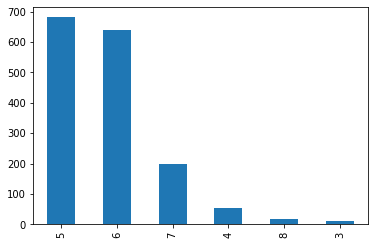

In [ ]:
wine['quality'].value_counts().plot(kind="bar");

Pada langkah berikut akan ditampilkan hasil compare diantara sepal lenght

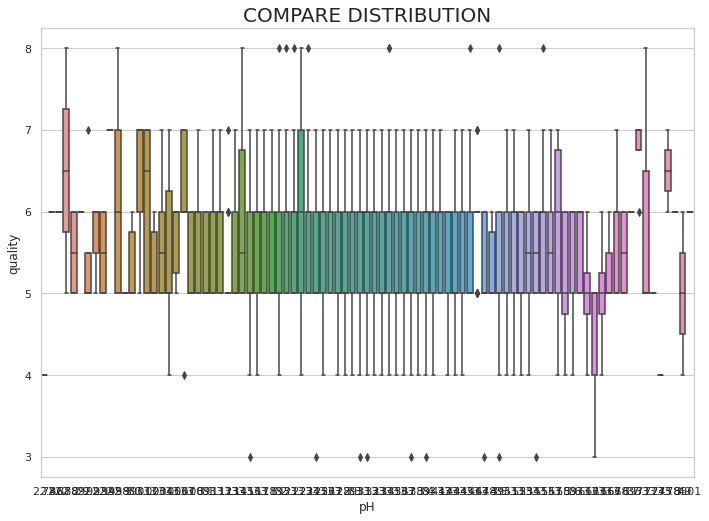

In [ ]:
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="COMPARE DISTRIBUTION"

sns.boxplot(x="pH", y="quality", data=wine)

plt.title(title, fontsize=20)
# Show the plot
plt.show()

Pada langkah ini akan menampilkan hasil compare distribusi diantara sepal widht

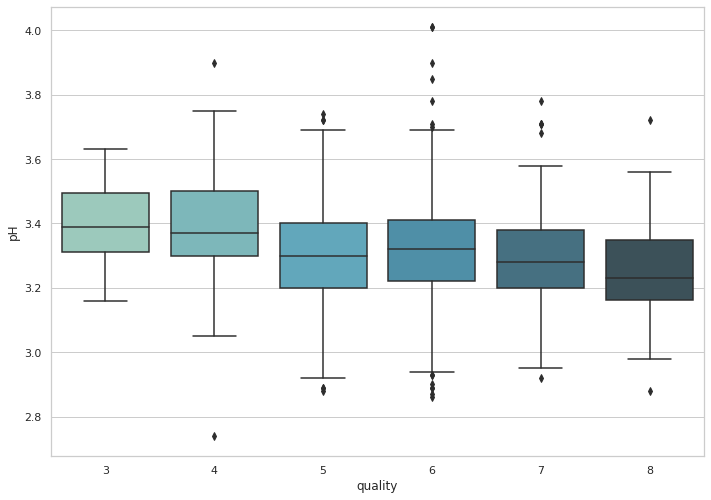

In [ ]:
sns.boxplot(x="quality", y="pH", data=wine)

# Show the plot
plt.show()

Pada langkah ini akan menampilkan hasil compare distribusi diantara petal length

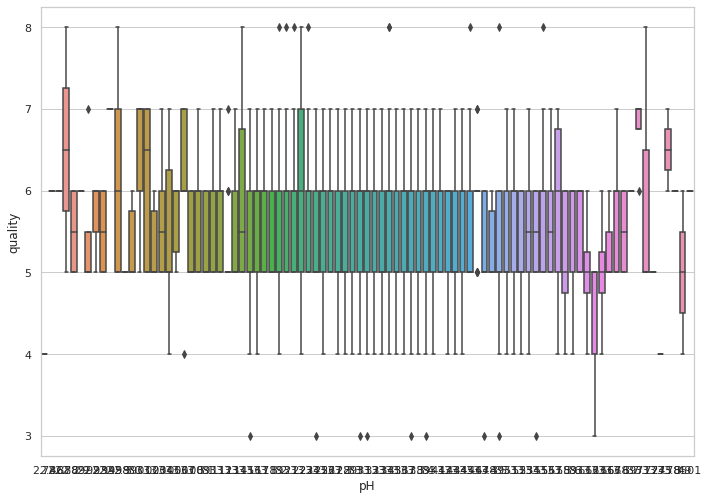

In [ ]:
sns.boxplot(x="pH", y="quality", data=wine)

# Show the plot
plt.show()

menampilkan semua countplot dari petal length yang di visualisasikan dengan diagram batang

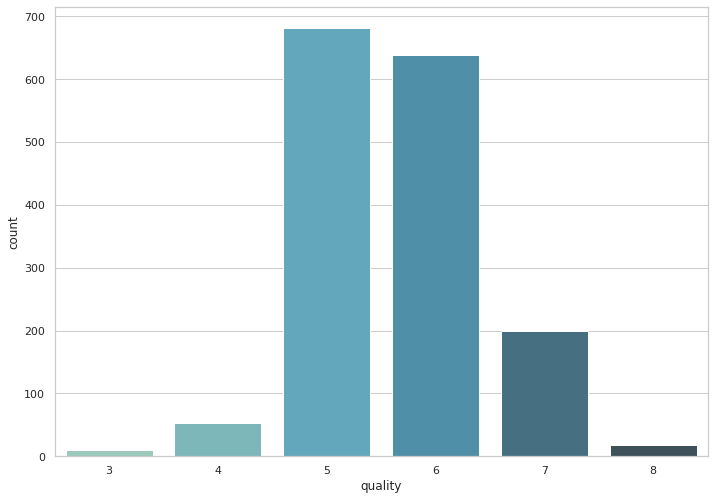

In [ ]:
sns.countplot(x='quality', data = wine)

menampilkan semua countplot dari petal width yang di visualisasikan dengan diagram batang

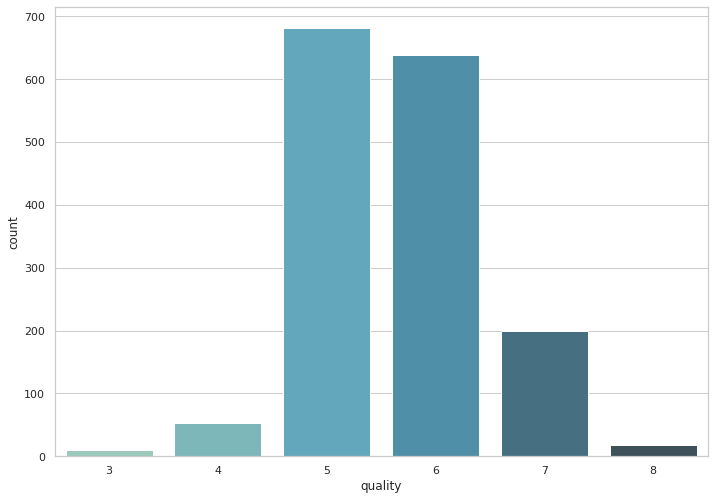

In [ ]:
sns.countplot(x='quality', data = wine)

selanjutnya kita menggunakan heatmap

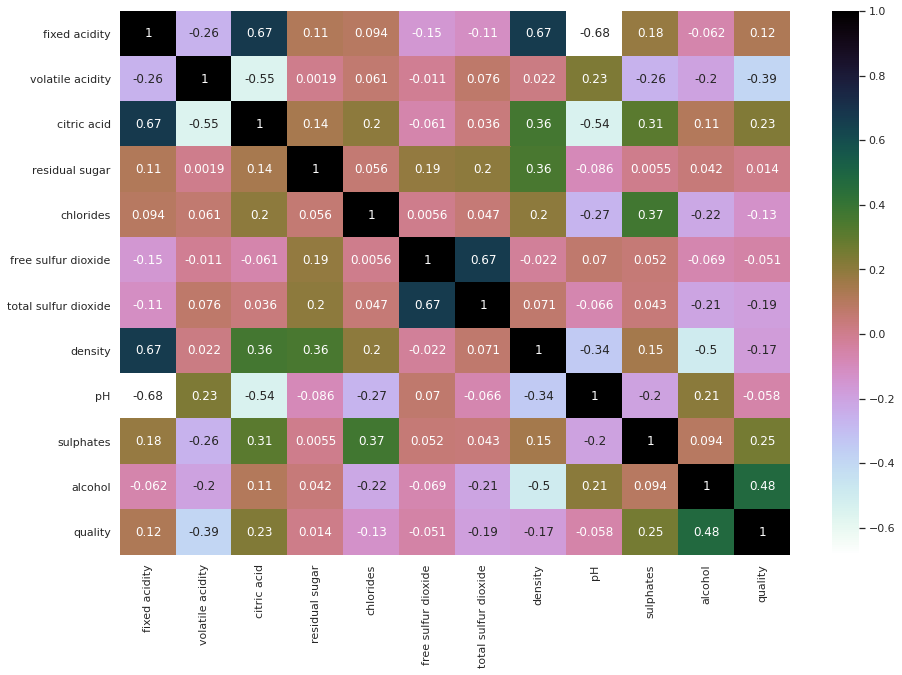

In [ ]:
plt.figure(figsize=(15,10)) 
sns.heatmap(wine.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

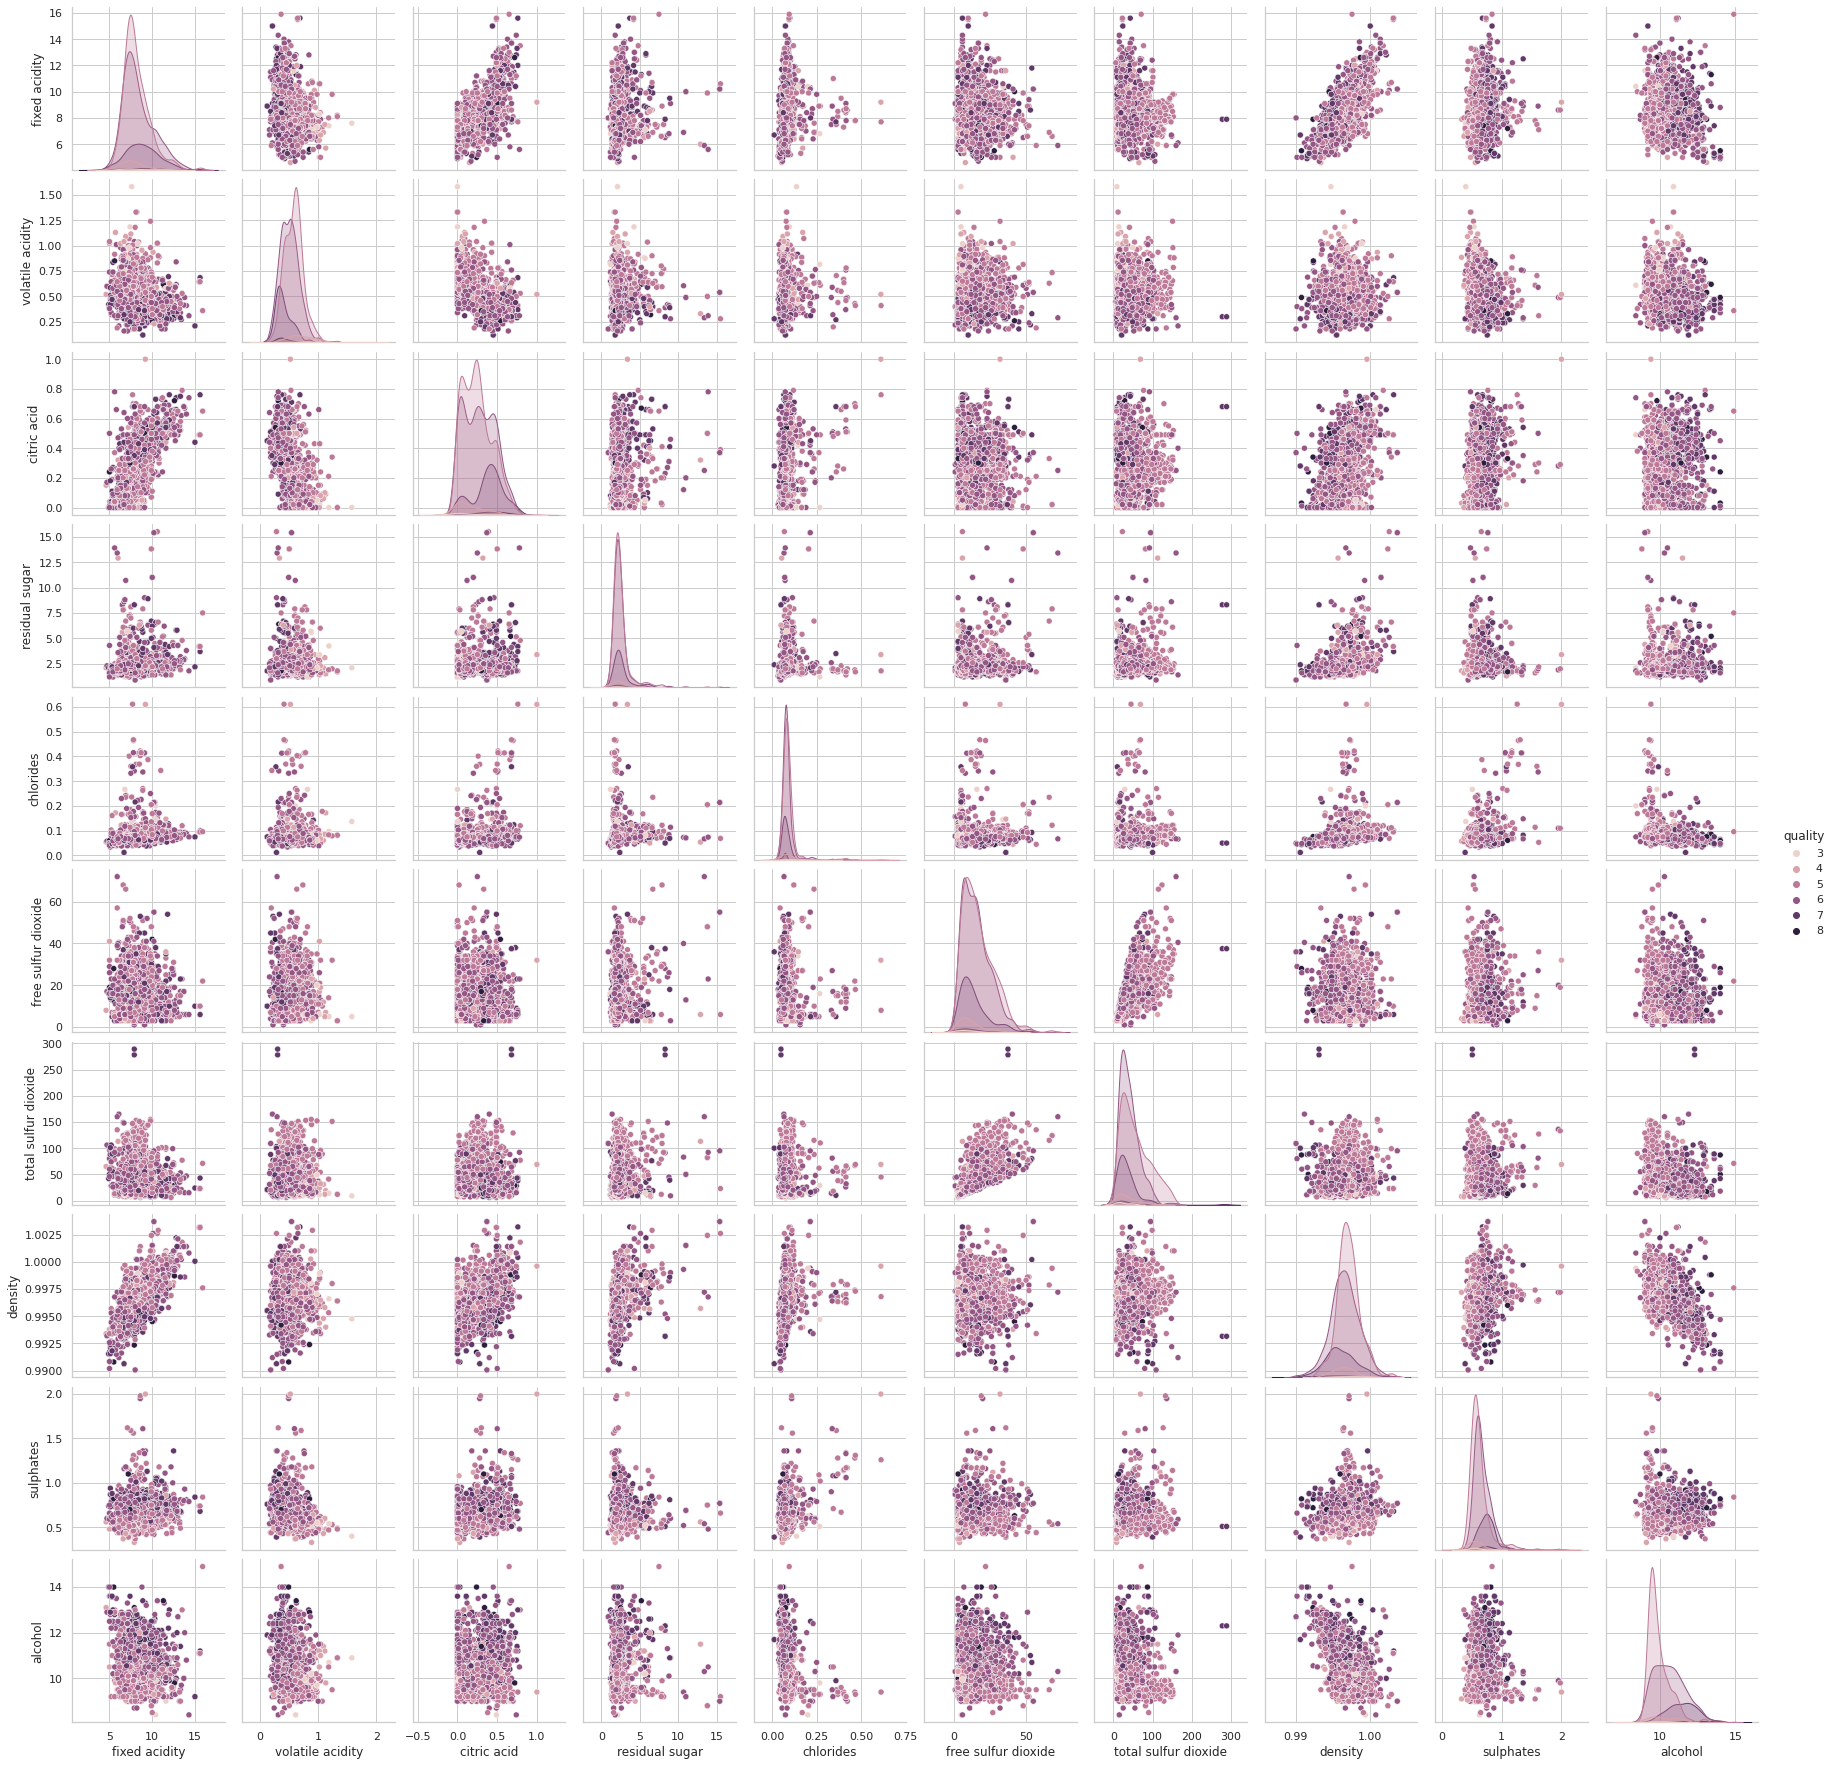

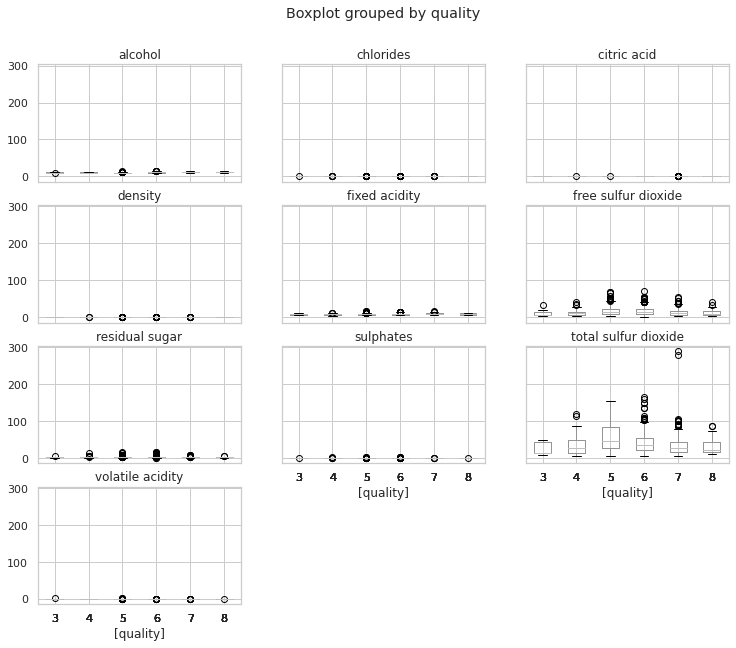

In [ ]:
sns.pairplot(wine[wine.columns.drop('pH')],hue='quality')
wine.drop("pH", axis=1).boxplot(by="quality", figsize=(12, 10))
plt.show()

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

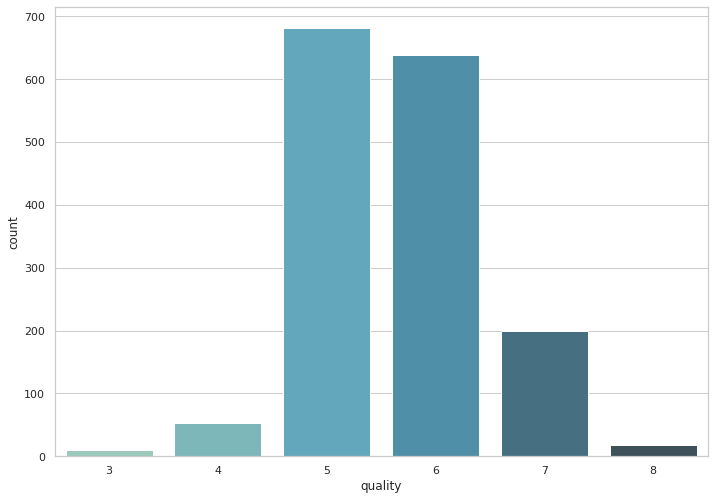

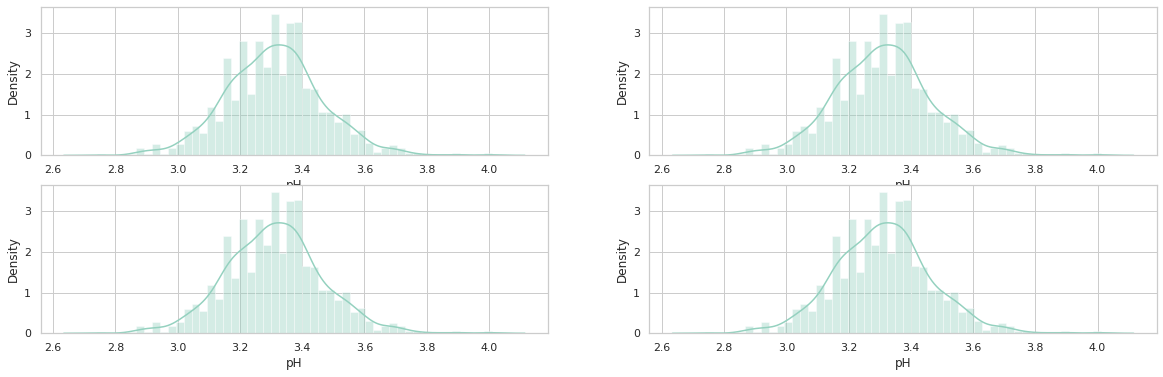

In [ ]:
sns.countplot(x=wine['quality'])
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,6))
print(wine['quality'].value_counts(normalize=True))
sns.distplot(wine['pH'],bins=50,ax=ax[0,0])
sns.distplot(wine['pH'],bins=50,ax=ax[0,1])
sns.distplot(wine['pH'],bins=50,ax=ax[1,0])
sns.distplot(wine['pH'],bins=50,ax=ax[1,1])
plt.show()

**UniVariate Analysis**

melakukan visualisasi data dengan menggunakan boxplot dimana memberikan hasil bahwa lebar setosa lebih kecil dari spesies lain, hal ini berarti setosa memiliki penyebaran yang paling kecil dibandingkan dengan spesies versicolor dan virginica.



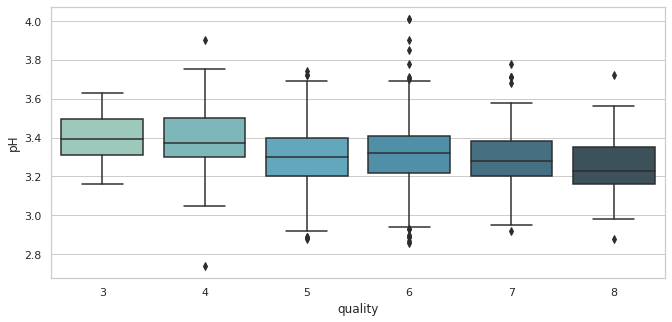

In [ ]:
plt.figure(figsize = (11,5))
sns.boxplot(x = 'quality',y = 'pH',data = wine)
plt.show()

melakukan visualisasi data dengan menggunakan Violin plot dimana dapat melihat kurva bentuk lonceng 

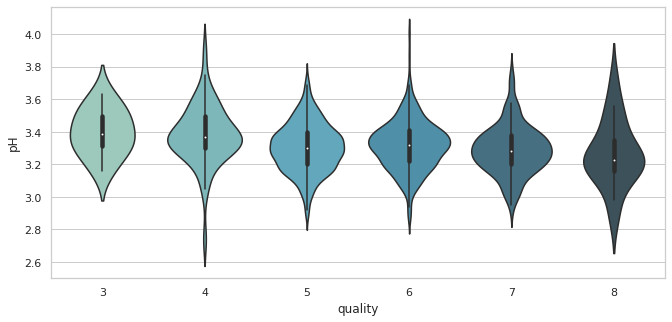

In [ ]:
plt.figure(figsize = (11,5))
sns.violinplot(x = 'quality',y = 'pH',data = wine,size = 8)
plt.show()

BiVariate Analysis

Plot 2-D antara panjang sepal dan lebar sepal. Versicolor dan virginica saling tumpang tindih.Sehingga sulit untuk memprediksi antara bunga bunga Iris spesies versicolor atau virginica

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


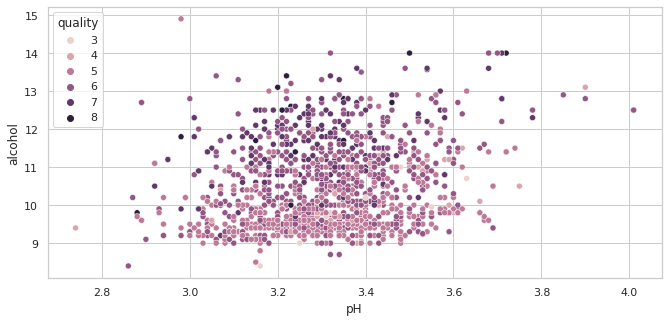

In [ ]:
plt.figure(figsize = (11,5))
sns.scatterplot('pH', 'alcohol',hue = 'quality',data = wine)
plt.show()

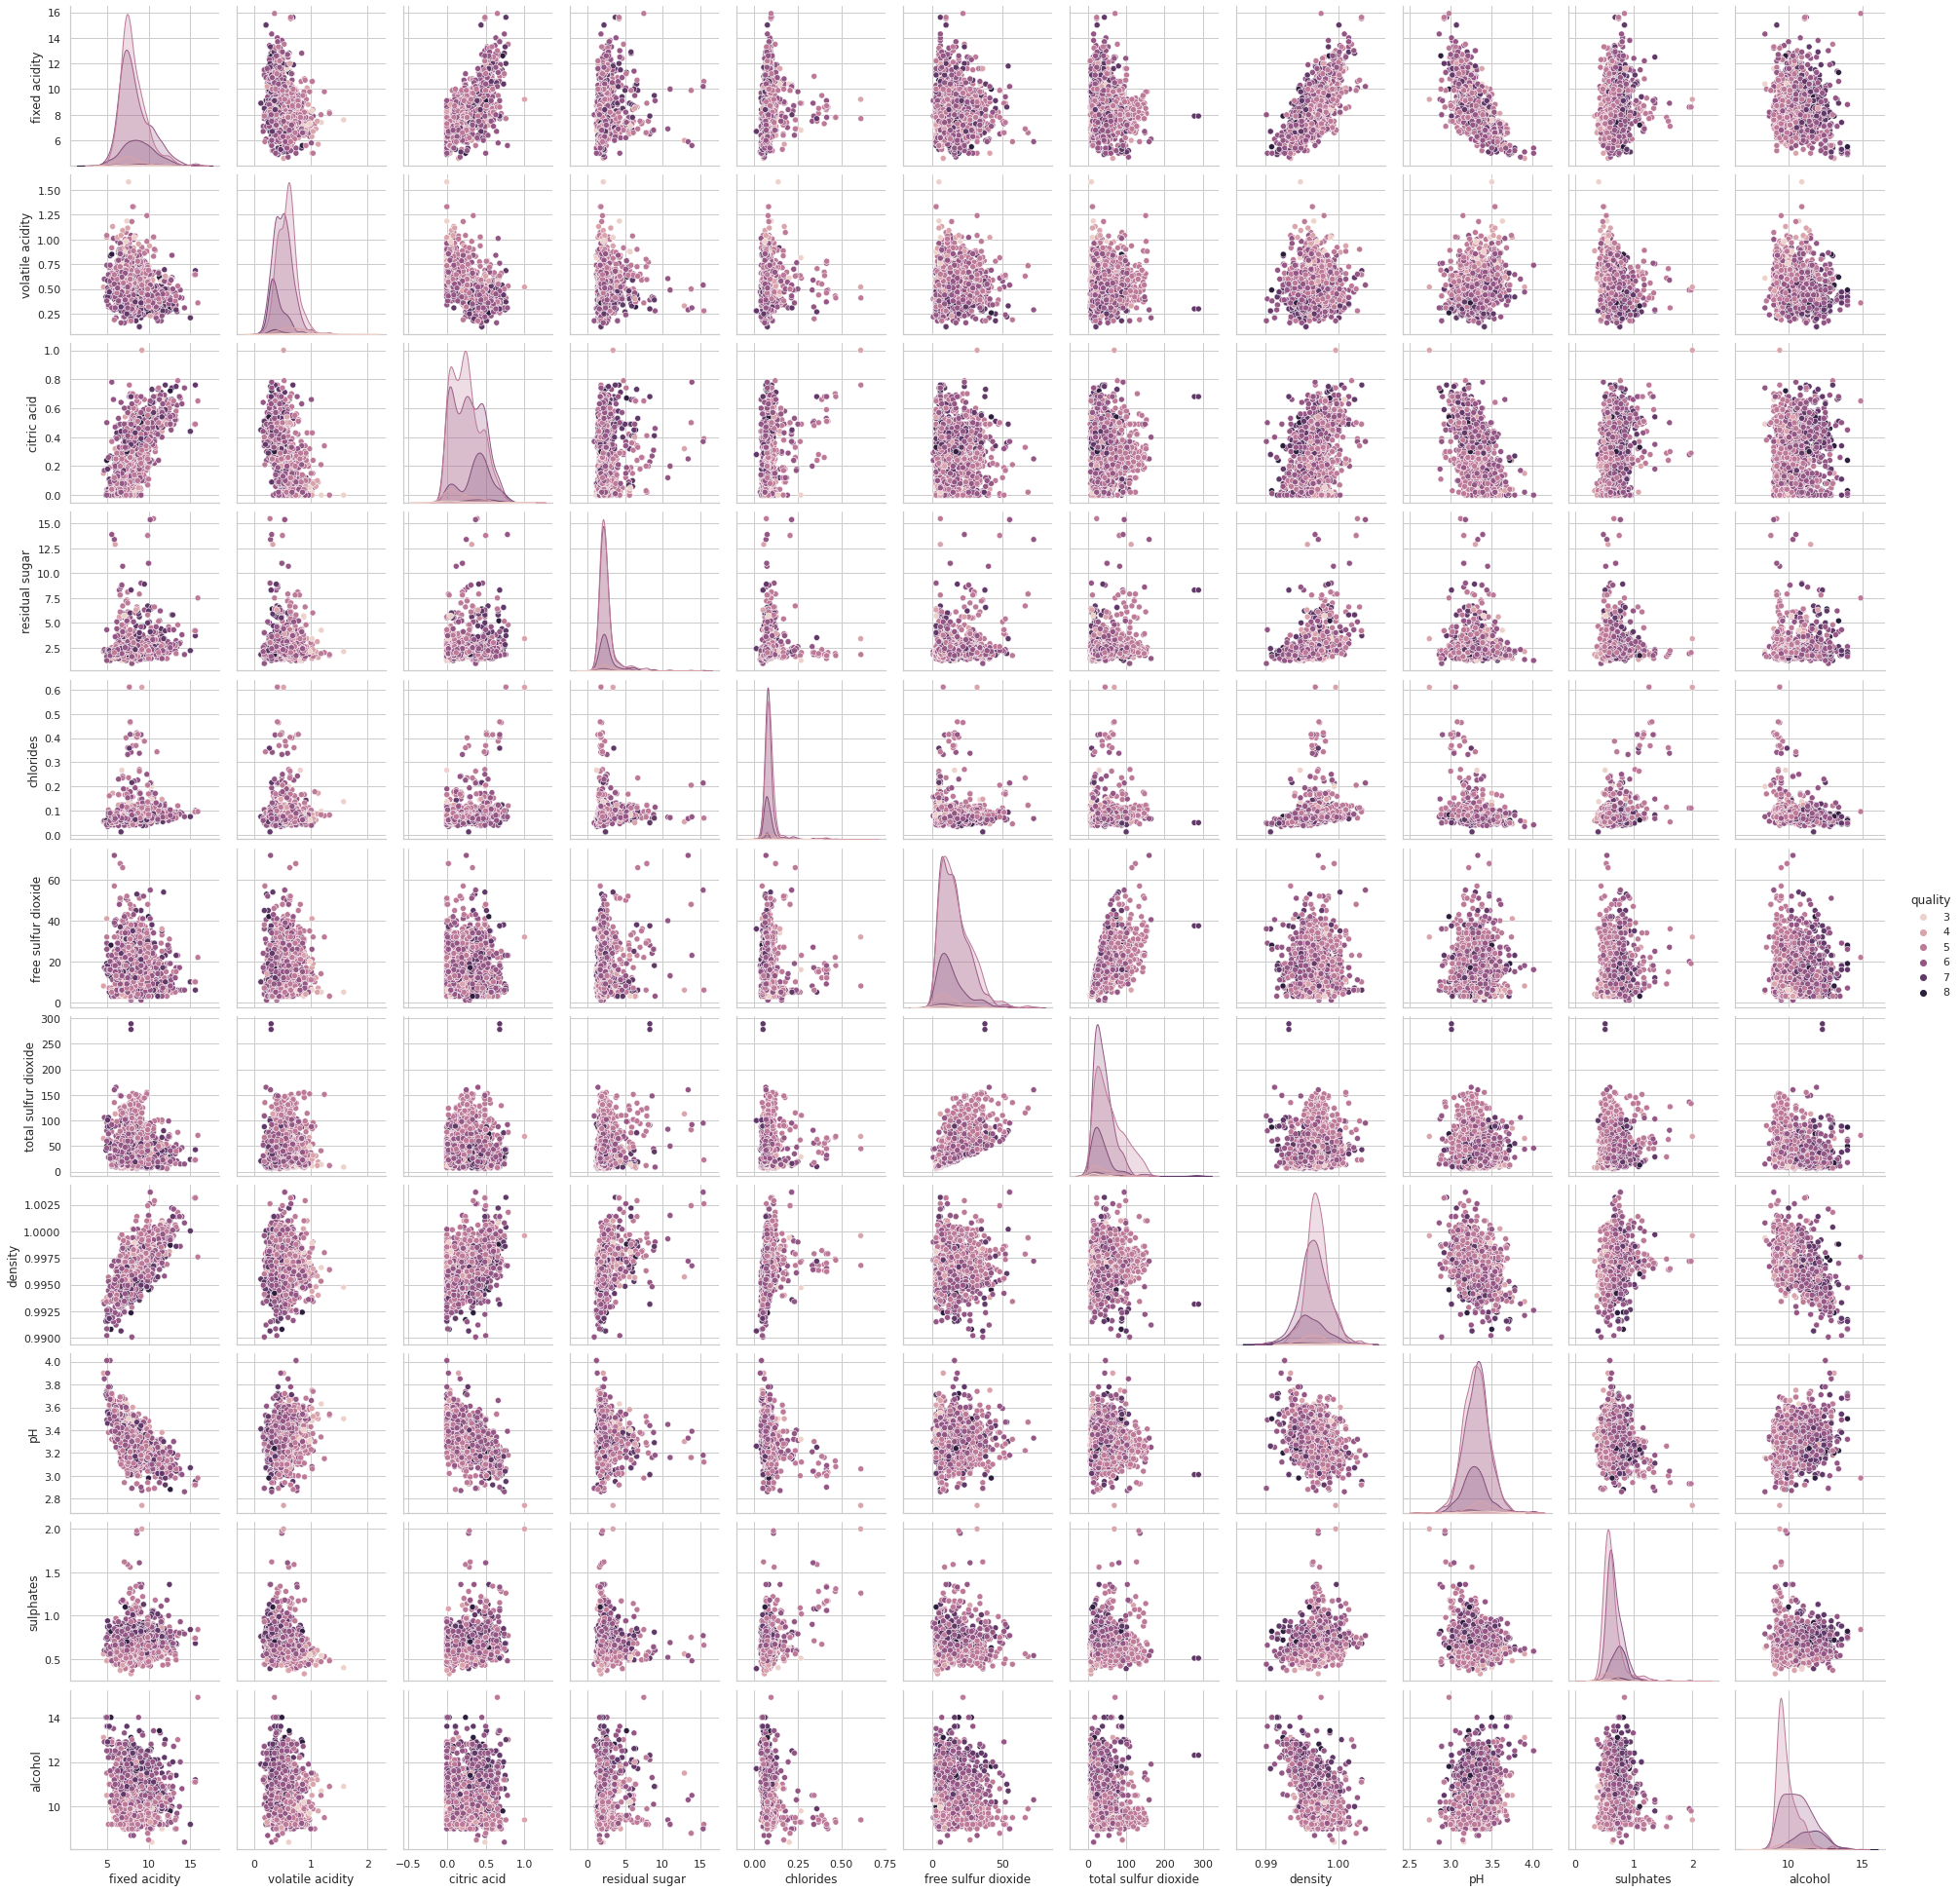

In [ ]:
#multivariate analysys
sns.pairplot(wine, hue="quality")
plt.show()


**PERMODELAN DATA**
---



**REGRESSION MODEL**


In [ ]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
#selecting the input and output features for regression tasks

In [ ]:
target = ['quality']
#selecting the input and output features for regression tasks

In [ ]:
X = wine[features]
y = wine[target]
#checkingnullvaluesdataset

In [ ]:
#performtraintestsplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=200)

In [ ]:
#fitontrainset
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predictontestdata
y_prediction = regressor.predict(X_test)
print(y_prediction[:5])
print('*'*40)
print(y_test[:5])

[[5.6362557 ]
 [5.73580131]
 [5.51754284]
 [5.48101339]
 [5.69866009]]
****************************************
      quality
366         7
1325        6
133         6
1418        5
1258        6


In [ ]:
#predictontestdata
y_test.describe()

quality
count  528.000000
mean     5.575758
std      0.753196
min      3.000000
25%      5.000000
50%      5.500000
75%      6.000000
max      8.000000

In [ ]:
#Evaluate Linear Regression accuracy using root-mean-square-error
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
print(RMSE)

0.6053813640476213


**DESICION TREE**

In [ ]:
regressor = DecisionTreeRegressor(max_depth=50)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Perform prediction using decision tree regressor
y_prediction = regressor.predict(X_test)
y_prediction[:5]

array([7., 6., 5., 5., 6.])

In [ ]:
y_test[:5]

quality
366         7
1325        6
133         6
1418        5
1258        6

In [ ]:
#Evaluate Decision Tree Regression accuracy using root-mean-square-error
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))

In [ ]:
print(RMSE)

0.7650014854412197


**CLASSIFICATION MODEL**

In [ ]:
#ClassificationModel
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#copying data set to a new dataset jadi tidak akan ada perubahan di data set lama
data_classifier = wine.copy()

In [ ]:
data_classifier.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
data_classifier['quality'].dtype

dtype('int64')

In [ ]:
#Convert to a Classification Task
#we shall create a new column called Quality Label. This column will contain the values of 0 & 1
#1 <- good, 0 <- bad
data_classifier['quality_label'] = (data_classifier['quality'] > 6.5)*1

In [ ]:
data_classifier['quality_label']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality_label, Length: 1599, dtype: int64

In [ ]:
#Selecting the input and output features for classification tasks
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target_classifier = ['quality_label']

In [ ]:
X = data_classifier[features]
y = data_classifier[target_classifier]

In [ ]:
#Perform train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [ ]:
#Fit on train set
wine_quality_classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)

In [ ]:
wine_quality_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Predict on test data
prediction = wine_quality_classifier.predict(X_test)
print(prediction[:5])
print('*'*10)
print(y_test['quality_label'][:5])

[0 0 0 1 0]
**********
1144    0
1532    0
618     0
205     1
1384    0
Name: quality_label, dtype: int64


In [ ]:
#Measure accuracy of the classifier
accuracy_score(y_true=y_test, y_pred=prediction)

0.9034090909090909

LOGISTIC REGRESSION

In [ ]:
#LOGISTICREGRESSION
from sklearn.linear_model import LogisticRegression

In [ ]:
data_classifier.head()

fixed acidity  volatile acidity  ...  quality  quality_label
0            7.4              0.70  ...        5              0
1            7.8              0.88  ...        5              0
2            7.8              0.76  ...        5              0
3           11.2              0.28  ...        6              0
4            7.4              0.70  ...        5              0

[5 rows x 13 columns]

In [ ]:
#Selecting the input and output features for classification tasks
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target_classifier = ['quality_label']

In [ ]:
X = data_classifier[features]
y = data_classifier[target_classifier]

In [ ]:
#Perform train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [ ]:
#Fit on train set
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predict on test data
prediction = logistic_regression.predict(X_test)
print(prediction[:5])
print(y_test[:5])

[0 0 0 0 0]
      quality_label
1144              0
1532              0
618               0
205               1
1384              0


In [ ]:
#Measure accuracy of the classifier
accuracy_score(y_true=y_test, y_pred=prediction)

0.884469696969697

**EVALUATION MODEL**
---
Dari 3 model diatas dapat diketahui bahwa nilai RMSEnya berbeda beda yaitu :

Regression Model : 0.6053813640476213

Desicion Tree :0.7821396449755147

Logistic Regression :0.884469696969697

Classification Model :

0.9034090909090909

untuk mengetahui model mana yang paling baik adalah dengan mengetahui nilai RMSE yang paling kecil dan itu adalah
REGRESSION MODEL